In [ ]:
import pickle,os,csv,sys
import pandas as pd
import matplotlib
#matplotlib.use("AGG")
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df = pd.read_csv("df_zebrafish.csv")
all_cols = list(df.columns)
all_cols.remove('effect')
data = df[all_cols]
data.set_index('name',inplace=True)
data

,rs28399504,SSTR1,AR,"CYP2D6*1, CYP2D6*10, CYP2D6*2, CYP2D6*3, CYP2D6*4, CYP2D6*41, CYP2D6*5, CYP2D6*6",rs2900478,TAS2R50,CYP2A6,rs1126647,NPBWR2,"SLCO1B1*15, SLCO1B1*1A, SLCO1B1*1B",...,UGT2B15,SULT1A2,rs9282861,SULT1A1,PTGES3,GABRA6,GRIA2,CHRNA7,GRIK2,GRIA4
name,,,,,,,,,,,,,,,,,,,,,
DB00396,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
DB00292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00602,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
DB01093,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB11148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB00903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DB00316,0,0,0,1,0,0,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
DB00270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Define colors for the effect gradient
color1 = 'royalblue'  # Low effect
color2 = 'yellow'  # High effect

In [ ]:
# Normalize effect values between 0 and 1
min_effect = min(df['effect'])
max_effect = max(df['effect'])
df['normalized_effect'] = (df['effect'] - min_effect) / (max_effect - min_effect)

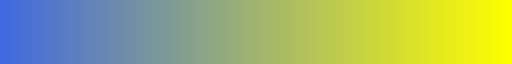

In [ ]:
# Create a colormap for the gradient effect
effect_cmap = LinearSegmentedColormap.from_list('EffectGradient', [color1, color2])
effect_cmap

In [ ]:
# Create a dictionary to store drug names and their corresponding effect colors
data_label_dic = {}
for index, row in df.iterrows():
    effect_color = effect_cmap(row['normalized_effect'])
    data_label_dic[row['name']] = effect_color

#print(data_label_dic)

In [ ]:
# Format object for row colors
(dnames, deffects) = zip(*[(k, v) for (k, v) in data_label_dic.items()])
rc_df_1 = pd.DataFrame.from_dict({'name': dnames, 'Effect': deffects})
rc_df_1 = rc_df_1.set_index('name')
print(rc_df_1.head())

                                                    Effect
name                                                      
DB00396                               (1.0, 1.0, 0.0, 1.0)
DB00292  (0.944482891195694, 0.9561707035755479, 0.0657...
DB00602  (0.871434063821607, 0.8985005767012687, 0.1522...
DB01093  (0.6668973471741638, 0.7370242214532872, 0.394...
DB11148  (0.6464436755094194, 0.720876585928489, 0.4186...


In [ ]:
from matplotlib.colors import to_hex
# Convert effect RGB tuples to hexadecimal color codes
rc_df = rc_df_1
rc_df['Effect'] = rc_df['Effect'].apply(lambda x: to_hex(x))
rc_df['Effect'] = rc_df['Effect'].astype(str)
rc_df

,Effect
name,
DB00396,#ffff00
DB00292,#f1f411
DB00602,#dee527
DB01093,#aabc65
DB11148,#a5b86b
...,...
DB00903,#456cdd
DB00316,#446bdd
DB00270,#436bde


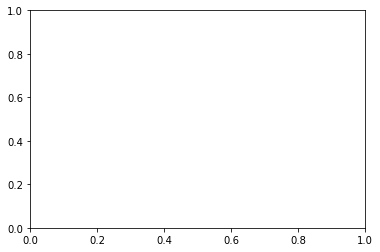

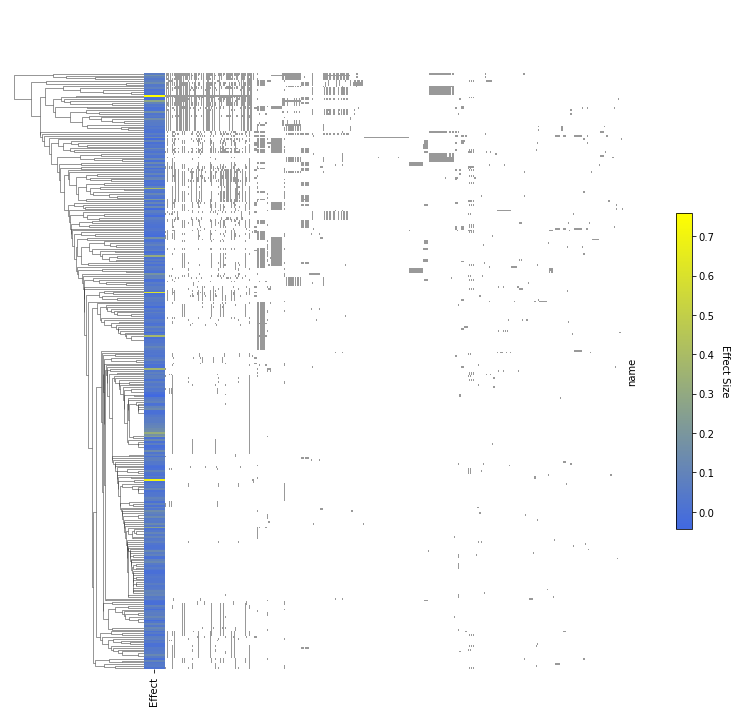

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, to_hex, Normalize
import matplotlib.colorbar as colorbar
# formatting for better colorbar
myColors = ((0.0, 0.0, 0.0, 0.0), (0.6, 0.6, 0.6, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

# Create a clustermap with continuous gradient for effect
fig, ax = plt.subplots()
g = sns.clustermap(data, cmap=cmap, yticklabels=False, xticklabels=False, row_colors=rc_df, col_cluster=False, dendrogram_ratio=(0.2, 0.1), cbar_pos=(0.05, 0.2, 0.03, 0.45))
# Add a colorbar legend to the side for the gradient, positioned further to the right
norm = Normalize(vmin=min_effect, vmax=max_effect)
sm = plt.cm.ScalarMappable(cmap=effect_cmap, norm=norm)
sm.set_array([])
cbar = g.fig.colorbar(sm, ax=g.ax_heatmap, orientation='vertical', fraction=0.03, pad=0.1)
cbar.set_label('Effect Size', rotation=270, labelpad=15)

g.cax.set_visible(False)

plt.savefig("heatmap_zebrafish.png", dpi=300)

plt.show()

<Figure size 432x288 with 0 Axes>